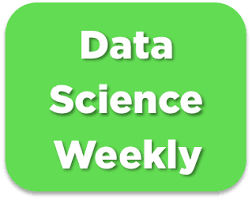

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [26]:
df_train = pd.read_csv('conversion_data_train.csv')
df_test =  pd.read_csv('conversion_data_test.csv')
#converted is the "target" variable

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [28]:
print((df_train["converted"].value_counts())/len(df_train) * 100)
# The value to be predicted is a binary category
# The target class is imbalanced there's 96% of values of class 0 and only 3 % of values of class 1

converted
0    96.774194
1     3.225806
Name: count, dtype: float64


In [29]:
df_train.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [30]:
print(f"There's a total of {df_train.isna().sum().sum()} Nans")
df_train.isna().sum()
# there's no Nans

There's a total of 0 Nans


country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

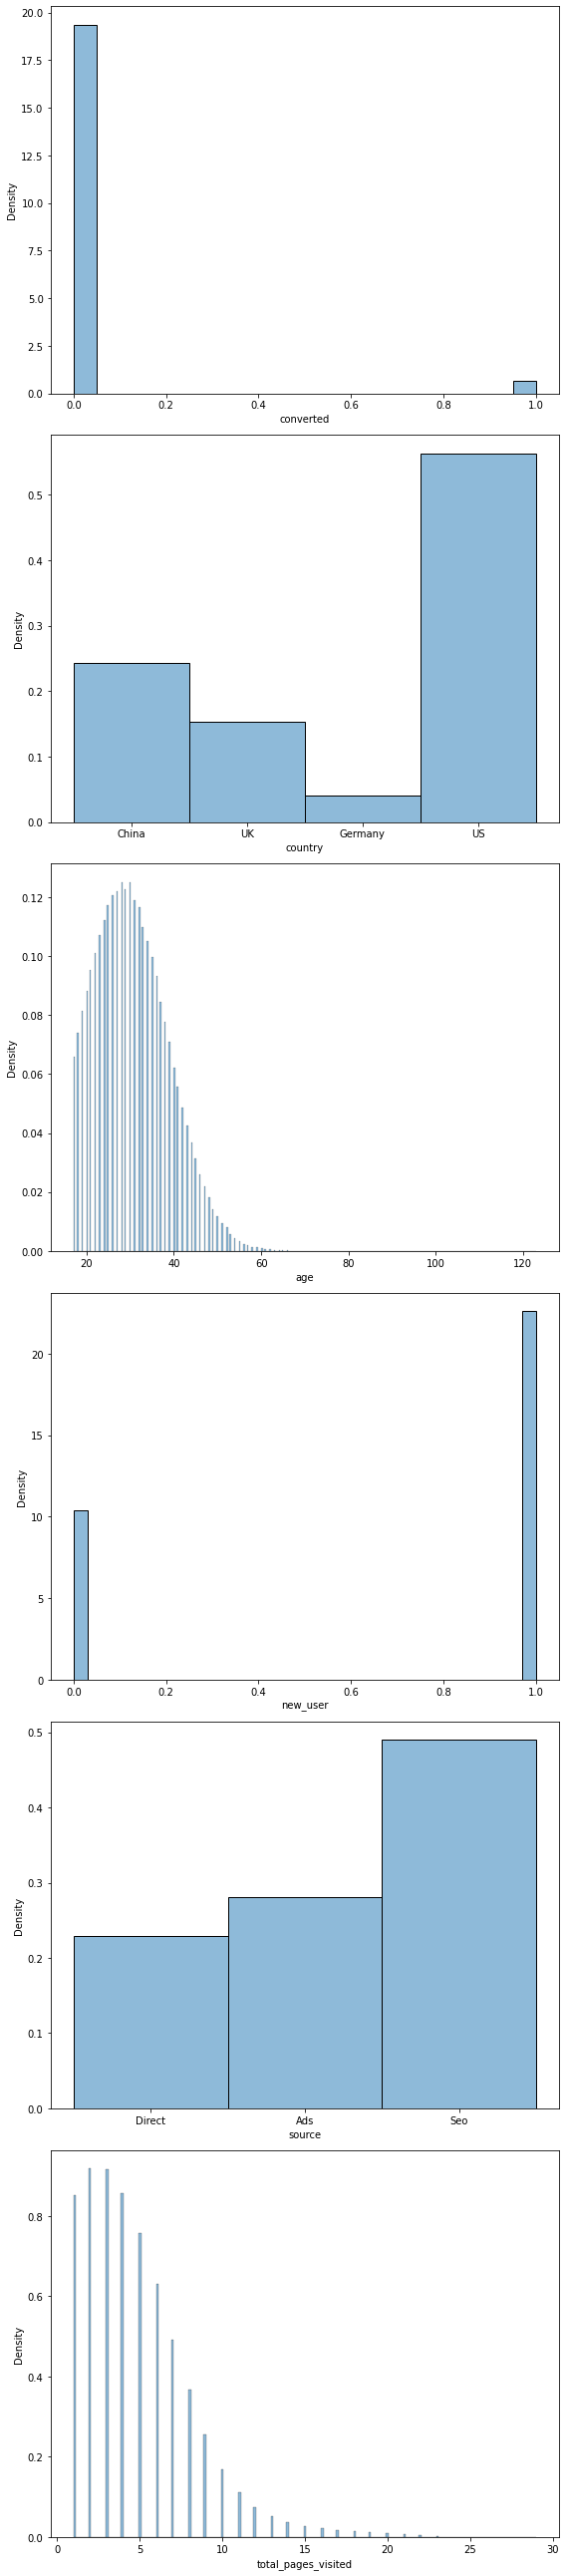

In [31]:
features = [ 'converted','country', 'age', 'new_user', 'source', 'total_pages_visited']
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6*len(features)))

custom_palette = "Set1"
for i, feature in enumerate(features):
    sns.histplot(data=df_train, x=feature, ax=axes[i], kde=False,
                stat='density', alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap of plots
plt.show()

#Even if the histograms for age and total pages visited are skewed and extreme values might be considered as outliers, I want to keep this data to train the models

In [32]:
df_train

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


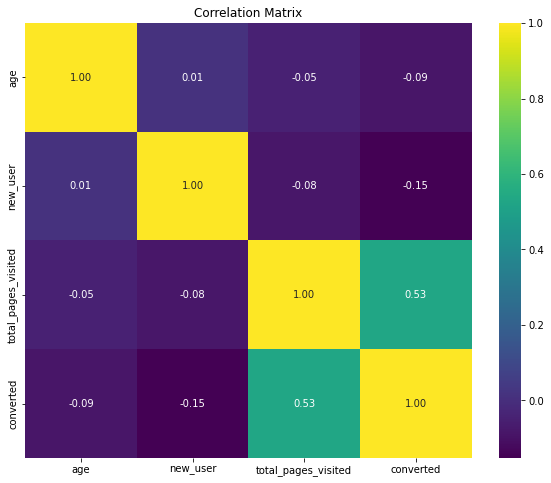

In [33]:
# Plotting the heatmap
columns= ["age","new_user","total_pages_visited", "converted"]
plt.figure(figsize=(10, 8))
correlation_matrix = df_train[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Define features and target variable
target_variable = "converted"
X = df_train.drop(target_variable, axis=1)
Y = df_train[target_variable]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, stratify = Y, random_state=42)

numeric_features = ['age','total_pages_visited']
categorical_features = ['country', 'new_user', 'source']

# Define transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

df_test_transformed = preprocessor.transform(df_test)
df_train_transformed = preprocessor.transform(df_train)


## LOGISTIC REGRESSION

In [35]:
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

param_grid = {'penalty': ['l2'], 
            'C': [0.5,1,1.2,1.3,1.5,2,3, 4,5]}

# Perform grid search with cross-validation
grid_search_logreg = GridSearchCV(estimator=logReg, param_grid=param_grid, cv=5)
grid_search_logreg.fit(X_train, Y_train)

# Get the best model
best_logreg = grid_search_logreg.best_estimator_
print("Best Hyperparameters:", grid_search_logreg.best_params_)

# Make predictions on the test set
Y_pred = best_logreg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Accuracy on training set : ", best_logreg.score(X_train, Y_train))
print("Accuracy on test set : ", best_logreg.score(X_test, Y_test))

Best Hyperparameters: {'C': 0.5, 'penalty': 'l2'}
Accuracy: 0.9863106532935755
Accuracy on training set :  0.9859090589640874
Accuracy on test set :  0.9863106532935755


In [36]:
#to check the standard deviation  of the accuracy  
scores = cross_val_score(grid_search_logreg, X_train, Y_train, cv=5)
print('The cross-validated accuracy is :', scores.mean())
print('The standard deviation is :', scores.std())

The cross-validated accuracy is : 0.9858739175316609
The standard deviation is : 0.0006773738907907964


In [37]:
ypredtrain_log_clf = best_logreg.predict(X_train)
ypredtest_log_clf = best_logreg.predict(X_test)

f1_trainlog = f1_score(Y_train, ypredtrain_log_clf)
f1_testlog = f1_score(Y_test, ypredtest_log_clf)

precision_train = precision_score(Y_train, ypredtrain_log_clf)
precision_test = precision_score(Y_test, ypredtest_log_clf)

recall_train = recall_score(Y_train, ypredtrain_log_clf)
recall_test = recall_score(Y_test, ypredtest_log_clf)

scores_df = pd.DataFrame()
# For training set
train_scores_df = pd.DataFrame({'model': ['logReg'], 
                                 'set': ['train'],
                                 'accuracy': [best_logreg.score(X_train, Y_train)], 
                                 'f1_score': [f1_trainlog],
                                 'recall' : [recall_train],
                                 'precision': [precision_train],
                                 })
scores_df = pd.concat([scores_df, train_scores_df], ignore_index=True)

# For test set
test_scores_df = pd.DataFrame({'model': ['logReg'],
                               'set': ['test'],
                               'accuracy': [best_logreg.score(X_test, Y_test)],
                               'f1_score': [f1_testlog],
                               'recall' : [recall_test],
                               'precision': [precision_test]
                               })
scores_df = pd.concat([scores_df, test_scores_df], ignore_index=True)
scores_df

,model,set,accuracy,f1_score,recall,precision
0,logReg,train,0.985909,0.757801,0.683370,0.850429
1,logReg,test,0.986311,0.764162,0.687519,0.860035


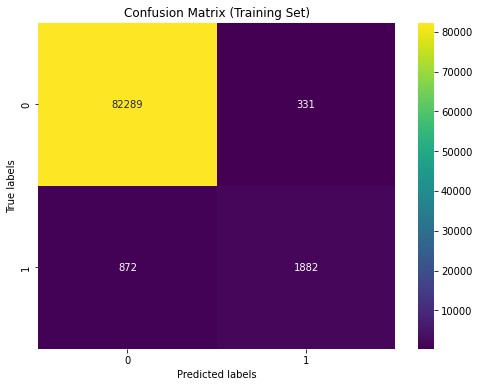

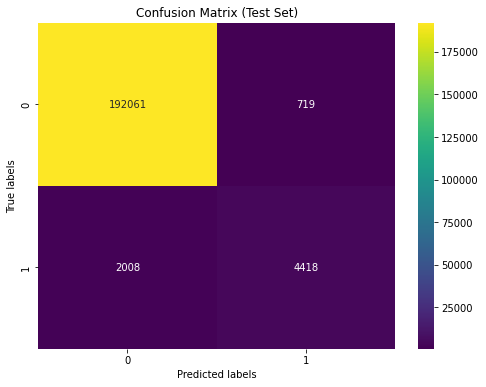

In [38]:
# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(Y_train, ypredtrain_log_clf)

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(Y_test, ypredtest_log_clf)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, cmap='viridis', fmt='g')
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='viridis', fmt='g')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Predict logistic regression in the Test set

In [39]:
#I am statisfy with the results,I train the best model obtained with the grid search in the entire df_train dataset 
X_prep = preprocessor.fit_transform(X)
best_logreg.fit(X_prep, Y)

LogisticRegression(C=0.5)

## TREE CLASSIFIER 

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5, 6],
    'random_state': [0,10,40,50]}

# Initialize GridSearchCV
tree_grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# Fit the grid search to the preprocessed training data
tree_grid_search.fit(X_train, Y_train)

# Get the best estimator
best_tree = tree_grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", tree_grid_search.best_params_)
print("Accuracy on training set :", best_tree.score(X_train, Y_train))
print("Accuracy on test set :", best_tree.score(X_test, Y_test))

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Accuracy on training set : 0.9852999742310306
Accuracy on test set : 0.985286587753381


In [41]:
#To check the estandard deviation  of the accuracy  
scores = cross_val_score(tree_grid_search, X_train, Y_train, cv=5)
print('The cross-validated score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated score is :  0.9850422848024729
The standard deviation is :  0.00042971678643138265


In [42]:
# Calculate the scores for the best decision tree model
ypred_traintree_clf = best_tree.predict(X_train)
ypredtest_tree_clf = best_tree.predict(X_test)

f1_traintree = f1_score(Y_train, ypred_traintree_clf)
f1_testtree = f1_score(Y_test, ypredtest_tree_clf)

precision_traintree = precision_score(Y_train, ypred_traintree_clf)
precision_testtree = precision_score(Y_test, ypredtest_tree_clf)

recall_traintree = recall_score(Y_train, ypred_traintree_clf)
recall_testtree = recall_score(Y_test, ypredtest_tree_clf)

# For training set
train_scores_tree_df = pd.DataFrame({'model': ['tree'], 
                                      'set': ['train'],
                                      'accuracy': [best_tree.score(X_train, Y_train)], 
                                      'f1_score': [f1_traintree],
                                      'recall' : [recall_traintree],
                                      'precision': [precision_traintree],
                                     })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, train_scores_tree_df], ignore_index=True)

# For test set
test_scores_tree_df = pd.DataFrame({'model': ['tree'],
                                    'set': ['test'],
                                    'accuracy': [best_tree.score(X_test, Y_test)],
                                    'f1_score': [f1_testtree],
                                    'recall' : [recall_testtree],
                                    'precision': [precision_testtree],
                                   })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, test_scores_tree_df], ignore_index=True)
scores_df

,model,set,accuracy,f1_score,recall,precision
0,logReg,train,0.985909,0.757801,0.683370,0.850429
1,logReg,test,0.986311,0.764162,0.687519,0.860035
2,tree,train,0.985300,0.758515,0.715686,0.806795
3,tree,test,0.985287,0.758348,0.715686,0.806418


In [43]:
# # Calculate confusion matrix for training set
# conf_matrix_train = confusion_matrix(Y_train, ypred_traintree_clf)

# # Calculate confusion matrix for test set
# conf_matrix_test = confusion_matrix(Y_test, ypredtest_tree_clf)

# # Plot confusion matrix for training set
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_train, annot=True, cmap='viridis', fmt='g')
# plt.title('Confusion Matrix (Training Set)')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')

# # Plot confusion matrix for test set
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_test, annot=True, cmap='viridis', fmt='g')
# plt.title('Confusion Matrix (Test Set)')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()

#### Predict tree classifier in the Test set

In [44]:
#I am statisfy with the results,I want to train the best model obtained with the grid search in the entire df_train dataset 
best_tree.fit(X_prep, Y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [45]:
df_test_transformed = preprocessor.transform(df_test)
predictions_tree_clf = best_tree.predict(df_test_transformed)
df_predictions_tree_clf = pd.DataFrame(predictions_tree_clf)
df_predictions_tree_clf.to_csv("conversion_data_test_predictions_Clara-tree2.csv", index = False)  

## RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4,5,7],
    'random_state': [0,5,10,35,42]}

# Initialize GridSearchCV
grid_searchrf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3)

# Fit the grid search to the preprocessed training data
grid_searchrf.fit(X_train, Y_train)
scores = cross_val_score(rf_clf, X_train, Y_train, cv=3)
print('The cross-validated accuracy score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

# Get the best estimator
best_rf_clf = grid_searchrf.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_searchrf.best_params_)

The cross-validated accuracy score is :  0.9832033171691617
The standard deviation is :  0.0009122745790812519
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 10}


In [47]:
# Get the best estimator
best_rf_clf = grid_searchrf.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_searchrf.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 10}


In [48]:
# Make predictions
Y_train_pred_rf = best_rf_clf.predict(X_train)
Y_test_pred_rf = best_rf_clf.predict(X_test)

f1_trainrf = f1_score(Y_train, Y_train_pred_rf)
f1_testrf = f1_score(Y_test, Y_test_pred_rf)

precision_trainrf = precision_score(Y_train, Y_train_pred_rf)
precision_testrf = precision_score(Y_test, Y_test_pred_rf)

recall_trainrf = recall_score(Y_train, Y_train_pred_rf)
recall_testrf = recall_score(Y_test, Y_test_pred_rf)

# For training set
train_scores_rf_df = pd.DataFrame({'model': ['rf'], 
                                      'set': ['train'],
                                      'accuracy': [best_rf_clf.score(X_train, Y_train)], 
                                      'f1_score': [f1_trainrf],
                                      'recall' : [recall_trainrf],
                                      'precision': [precision_trainrf],
                                     })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, train_scores_rf_df], ignore_index=True)

# For test set
test_scores_rf_df = pd.DataFrame({'model': ['rf'],
                                    'set': ['test'],
                                    'accuracy': [best_rf_clf.score(X_test, Y_test)],
                                    'f1_score': [f1_testrf],
                                    'recall' : [recall_testrf],
                                    'precision': [precision_testrf],
                                   })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, test_scores_rf_df], ignore_index=True)
scores_df

,model,set,accuracy,f1_score,recall,precision
0,logReg,train,0.985909,0.757801,0.683370,0.850429
1,logReg,test,0.986311,0.764162,0.687519,0.860035
2,tree,train,0.985300,0.758515,0.715686,0.806795
3,tree,test,0.985287,0.758348,0.715686,0.806418
4,rf,train,0.986846,0.772902,0.693900,0.872204
5,rf,test,0.985809,0.754281,0.675226,0.854302


#### Predict Random forest classifier in the Test set

In [49]:
# Train the best model obtained with the grid search in the entire df_train dataset 
best_rf_clf.fit(X_prep, Y)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=10)

In [50]:
# predictions_rf_clf = best_rf_clf.predict(df_test_transformed)
# df_predictions_rf_clf = pd.DataFrame(predictions_rf_clf)
# df_predictions_rf_clf.to_csv("conversion_data_test_predictions_Clara-randomforest2.csv", index = False)  

## DECISION TREE WITH ADABOOST

In [51]:
from sklearn.ensemble import AdaBoostClassifier

# Perform grid search
decision_tree = DecisionTreeClassifier()
adaboost_dt = AdaBoostClassifier(decision_tree)

# Grid of values to be tested
params = {'base_estimator__max_depth': [8, 10, 12],
        'base_estimator__min_samples_leaf': [1, 2, 3],
        'base_estimator__min_samples_split': [6, 8, 10],
        'n_estimators': [2, 4, 6, 8, 10, 12]}

gridsearch_dtada = GridSearchCV(adaboost_dt, param_grid = params, cv = 3) 
gridsearch_dtada.fit(X_train, Y_train)

# Get the best estimator
best_dtada = gridsearch_dtada.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters : ", gridsearch_dtada.best_params_)
print("Best validation accuracy : ", gridsearch_dtada.best_score_)
print("Accuracy on training set : ", gridsearch_dtada.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch_dtada.score(X_test, Y_test))

c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
c:\Users\guijarro\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:720: 

Best hyperparameters :  {'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 6, 'n_estimators': 2}
Best validation accuracy :  0.984819734345351
Accuracy on training set :  0.9867758333918992
Accuracy on test set :  0.9852916076824996


In [52]:
# Make predictions
y_train_pred_dtada = best_dtada.predict(X_train)
y_test_pred_dtada = best_dtada.predict(X_test)

f1_traindtada = f1_score(Y_train, y_train_pred_dtada)
f1_testdtada = f1_score(Y_test, y_test_pred_dtada)

precision_traindtada = precision_score(Y_train, y_train_pred_dtada)
precision_testdtada = precision_score(Y_test, y_test_pred_dtada)

recall_traindtada = recall_score(Y_train, y_train_pred_dtada)
recall_testdtada = recall_score(Y_test, y_test_pred_dtada)

# For training set
train_scores_dtada_df = pd.DataFrame({'model': ['dtada'], 
                                      'set': ['train'],
                                      'accuracy': [best_dtada.score(X_train, Y_train)], 
                                      'f1_score': [f1_traindtada],
                                      'recall' : [recall_traindtada],
                                      'precision': [precision_traindtada],
                                     })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, train_scores_dtada_df], ignore_index=True)

# For test set
test_scores_dtada_df = pd.DataFrame({'model': ['dtada'],
                                    'set': ['test'],
                                    'accuracy': [best_dtada.score(X_test, Y_test)],
                                    'f1_score': [f1_testdtada],
                                    'recall' : [recall_testdtada],
                                    'precision': [precision_testdtada],
                                   })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, test_scores_dtada_df], ignore_index=True)
scores_df

,model,set,accuracy,f1_score,recall,precision
0,logReg,train,0.985909,0.757801,0.683370,0.850429
1,logReg,test,0.986311,0.764162,0.687519,0.860035
2,tree,train,0.985300,0.758515,0.715686,0.806795
3,tree,test,0.985287,0.758348,0.715686,0.806418
4,rf,train,0.986846,0.772902,0.693900,0.872204
5,rf,test,0.985809,0.754281,0.675226,0.854302
6,dtada,train,0.986776,0.775234,0.706972,0.858087
7,dtada,test,0.985292,0.750000,0.683940,0.830185


In [53]:
# Train the best model obtained with the grid search in the entire df_train dataset 
best_dtada.fit(X_prep, Y)
# predictions_dtada = best_dtada.predict(df_test_transformed)
# df_predictions_dtada = pd.DataFrame(predictions_dtada)
# df_predictions_dtada.to_csv("conversion_data_test_predictions_Clara-dtada.csv", index = False) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    min_samples_leaf=2,
                                                    min_samples_split=6),
                   n_estimators=2)

## Supervector machine (SVM)

##### Kernel == rbf

In [54]:
from sklearn.svm import SVC
# Grid of values to be tested
svc_clf = SVC(kernel = 'rbf', probability = True)
params = { 'C': [0.1, 1, 10, 100],            # Regularization parameter
            'gamma': [1, 0.1, 0.01, 0.001]}    
gridsearch = GridSearchCV(svc_clf, param_grid = params, cv = 3) 
gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [55]:
# Get the best estimator
best_svc = gridsearch.best_estimator_
print("Best Hyperparameters:", gridsearch.best_params_)

Best Hyperparameters: {'C': 100, 'gamma': 0.001}


In [56]:
#Calculate de standard deviation of the grid search
scores = cross_val_score(gridsearch, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.9858270667884836
The standard deviation is :  0.0003852902336401774


In [57]:
# Make predictions
y_train_pred_svc = best_svc.predict(X_train)
y_test_pred_svc = best_svc.predict(X_test)

f1_trainsvc = f1_score(Y_train, y_train_pred_svc)
f1_testsvc = f1_score(Y_test, y_test_pred_svc)

precision_trainsvc = precision_score(Y_train, y_train_pred_svc)
precision_testsvc = precision_score(Y_test, y_test_pred_svc)

recall_trainsvc = recall_score(Y_train, y_train_pred_svc)
recall_testsvc = recall_score(Y_test, y_test_pred_svc)

print('F1_train:', f1_trainsvc)
print('F1_test:', f1_testsvc)
print('Precision_train:', precision_trainsvc)
print('Precision_test:', precision_testsvc)
print('Recall_train:', recall_trainsvc)
print('Recall_test:', recall_testsvc)

# For training set
train_scores_svc_df = pd.DataFrame({'model': ['svc'], 
                                      'set': ['train'],
                                      'accuracy': [best_svc.score(X_train, Y_train)], 
                                      'f1_score': [f1_trainsvc],
                                      'recall' : [recall_trainsvc],
                                      'precision': [precision_trainsvc],
                                     })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, train_scores_svc_df], ignore_index=True)

# For test set
test_scores_svc_df = pd.DataFrame({'model': ['svc'],
                                    'set': ['test'],
                                    'accuracy': [best_svc.score(X_test, Y_test)],
                                    'f1_score': [f1_testsvc],
                                    'recall' : [recall_testsvc],
                                    'precision': [precision_testsvc],
                                   })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, test_scores_svc_df], ignore_index=True)
scores_df

F1_train: 0.7491708126036485
F1_test: 0.7535793686082704
Precision_train: 0.8729468599033816
Precision_test: 0.8792280556131977
Recall_train: 0.6561365286855483
Recall_test: 0.6593526299408652


,model,set,accuracy,f1_score,recall,precision
0,logReg,train,0.985909,0.757801,0.683370,0.850429
1,logReg,test,0.986311,0.764162,0.687519,0.860035
2,tree,train,0.985300,0.758515,0.715686,0.806795
3,tree,test,0.985287,0.758348,0.715686,0.806418
4,rf,train,0.986846,0.772902,0.693900,0.872204
5,rf,test,0.985809,0.754281,0.675226,0.854302
6,dtada,train,0.986776,0.775234,0.706972,0.858087
7,dtada,test,0.985292,0.750000,0.683940,0.830185
8,svc,train,0.985827,0.749171,0.656137,0.872947
9,svc,test,0.986090,0.753579,0.659353,0.879228


#### Predict SVM classifier in the Test set

In [58]:
best_svc.fit(X_prep, Y)

SVC(C=100, gamma=0.001, probability=True)

In [59]:
predictions_svc_clf = best_svc.predict(df_test_transformed)
df_predictions_svc_clf = pd.DataFrame(predictions_svc_clf)
df_predictions_svc_clf.to_csv("conversion_data_test_predictions_Clara-SVM2.csv", index = False)  

## XGBClassifier

In [60]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
xgboost = XGBClassifier()

# Grid of values to be tested
params = {'max_depth': [4, 6, 8, 10],
        'min_child_weight': [1, 2, 4, 6, 8],
        'n_estimators': [2, 4, 6, 8, 10, 12]}

gridsGridSearchCV= GridSearchCV(xgboost, param_grid = params, cv = 3) 
gridsGridSearchCV.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [1, 2, 4, 6, 8],
                         'n_estimators': [2, 4, 6, 8, 10, 12]})

In [61]:
# Get the best estimator
best_xgboost = gridsGridSearchCV.best_estimator_
print("Best Hyperparameters:", gridsGridSearchCV.best_params_)
#Calculate de standard deviation of the grid search
scores = cross_val_score(gridsGridSearchCV, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Best Hyperparameters: {'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 12}
The cross-validated R2-score is :  0.985545950757842
The standard deviation is :  3.3129841927783927e-05


In [62]:
# Make predictions
y_train_pred_xgboost = best_xgboost.predict(X_train)
y_test_pred_xgboost = best_xgboost.predict(X_test)

f1_trainxgb = f1_score(Y_train, y_train_pred_xgboost)
f1_testxgb = f1_score(Y_test, y_test_pred_xgboost)

precision_trainxgb = precision_score(Y_train, y_train_pred_xgboost)
precision_testxgb = precision_score(Y_test, y_test_pred_xgboost)

recall_trainxgb = recall_score(Y_train, y_train_pred_xgboost)
recall_testxgb = recall_score(Y_test, y_test_pred_xgboost)

# For training set
train_scores_xgb_df = pd.DataFrame({'model': ['XGBoost'], 
                                      'set': ['train'],
                                      'accuracy': [best_xgboost.score(X_train, Y_train)], 
                                      'f1_score': [f1_trainxgb],
                                      'recall' : [recall_trainxgb],
                                      'precision': [precision_trainxgb],
                                     })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, train_scores_xgb_df], ignore_index=True)

# For test set
test_scores_xgb_df = pd.DataFrame({'model': ['XGBoost'],
                                    'set': ['test'],
                                    'accuracy': [best_xgboost.score(X_test, Y_test)],
                                    'f1_score': [f1_testxgb],
                                    'recall' : [recall_testxgb],
                                    'precision': [precision_testxgb],
                                   })

# Concatenate with existing scores_df if it exists, otherwise assign the new DataFrame to it
scores_df = pd.concat([scores_df, test_scores_xgb_df], ignore_index=True)
scores_df

,model,set,accuracy,f1_score,recall,precision
0,logReg,train,0.985909,0.757801,0.683370,0.850429
1,logReg,test,0.986311,0.764162,0.687519,0.860035
2,tree,train,0.985300,0.758515,0.715686,0.806795
3,tree,test,0.985287,0.758348,0.715686,0.806418
4,rf,train,0.986846,0.772902,0.693900,0.872204
5,rf,test,0.985809,0.754281,0.675226,0.854302
6,dtada,train,0.986776,0.775234,0.706972,0.858087
7,dtada,test,0.985292,0.750000,0.683940,0.830185
8,svc,train,0.985827,0.749171,0.656137,0.872947
9,svc,test,0.986090,0.753579,0.659353,0.879228


In [63]:
best_xgboost.fit(X_prep, Y)
# predictions_xgboost = best_xgboost.predict(df_test_transformed)
# df_predictions_xgboost = pd.DataFrame(predictions_xgboost)
# df_predictions_xgboost.to_csv("conversion_data_test_predictions_Clara-xgboost.csv", index = False) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

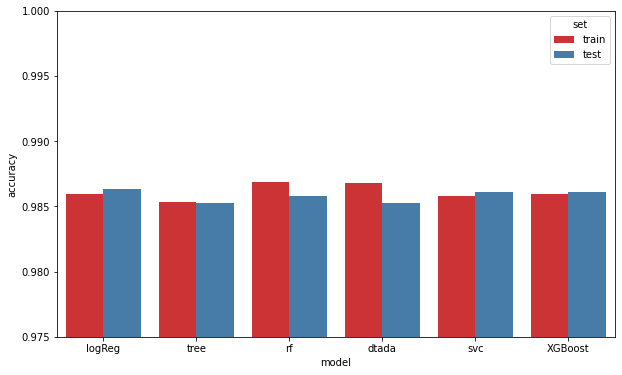

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=scores_df, x="model", y="accuracy", hue="set", palette="Set1")
ax = plt.gca()
ax.set_ylim(0.975, 1)
plt.show()

### As the classes are imbalanced, it it more accurate to look at the f1-score than the accuracy.
- Rndom forest and decision tree with Adaboost are the ones with higher accuracy results in train but they tend to overfit.
- The best models are logistic regression and XGboost. I would finally use XGBoost as model